#Atividade de Frequência

*   Entregar um programa implementado em Python para calcular a regressão linear de um conjunto de dados. 

## 1.   *Importações dos módulos*

    * Aqui serão importados o numpy, pandas, matplotlib e o seaborn




In [3]:
# This is not strictly for a Python rather. 
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
 
sns.set()                         #Configura os plots do matplotlib para terem os mesmos estilos do seaborn
sns.set_style("whitegrid")        #Alterando o estilo do plot para melhor vizualização no colab (Tema escuro fica ruim de ver o fundo)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## 2.   *Dataset "Summary of Weather"*

    *  O dataset "Summary of Weather" será retirado de um repositório do github

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Berawecker/Datasets/main/Summary%20of%20Weather.csv')

data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,27,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,12,28,0.39,NaN,NaN,85.0,65.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,12,29,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,30,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Regressão linear

    * Será feito apenas uma regressão linear simples onde será determinado a temperatura máxima do dia atravéz da temperatura mínima

In [7]:
#Serão utilizadas os dados de "Temperatura minima" para determinar a "Temperatura máxima" de um dia qualquer
x = data.iloc[: , 5].values.reshape(-1,1) #Para separar a coluna "MinTemp"
y = data.iloc[: , 4].values.reshape(-1,1) #Para separar a coluna "MaxTemp"

Text(0.5, 1.0, 'Dados de temperatura')

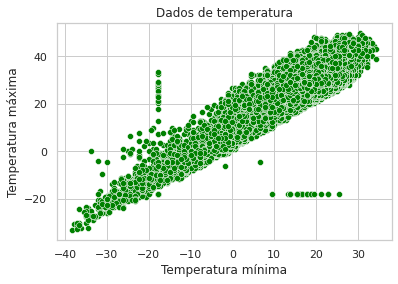

In [8]:
#Plotando o gráfico dos dados
plt.scatter(x, y, color = "green", edgecolors='white', linewidth = 0.5)
plt.xlabel("Temperatura mínima")
plt.ylabel("Temperatura máxima")
plt.title("Dados de temperatura")

In [9]:
#Separando os dados entre os que serão usados para treino e para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Treinamento do regressor
regressor = LinearRegression()
regressor = regressor.fit(x_train, y_train)

In [13]:
#Calculo das predições
predictions = regressor.predict(x_test)

#Calculando o r2 do modelo
print("R2 score:", r2_score(y_test, predictions))

R2 score: 0.7670218843587764


Text(0.5, 1.0, 'Regressão linear')

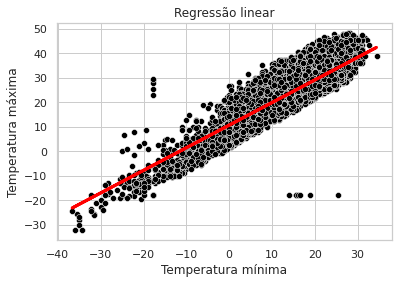

In [15]:
#Visualizando a regressão linear
plt.scatter(x_test, y_test, color = "black", edgecolors='white', linewidth = 0.5)
plt.plot(x_test, predictions, color = "red", linewidth = 3)
plt.xlabel("Temperatura mínima")
plt.ylabel("Temperatura máxima")
plt.title("Regressão linear")